In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("hotel_booking_data.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.shape

(119390, 36)

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
# Select all numeric columns
X = df.select_dtypes(include=['int64','float64']).copy()

print("Selected Features:\n", X.columns.tolist())


Selected Features:
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
#Find missing value
X.isnull().sum()

is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
agent                              16340
company                           112593
days_in_waiting_list                   0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
dtype: int64

In [15]:
# Handle the missing value
X = X.fillna(X.median())
print(X)

        is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0                 0        342               2015                        27   
1                 0        737               2015                        27   
2                 0          7               2015                        27   
3                 0         13               2015                        27   
4                 0         14               2015                        27   
...             ...        ...                ...                       ...   
119385            0         23               2017                        35   
119386            0        102               2017                        35   
119387            0         34               2017                        35   
119388            0        109               2017                        35   
119389            0        205               2017                        35   

        arrival_date_day_of_month  stays_in_weekend

In [18]:
# Scale features
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
print(Xs)

[[-0.76704049  2.22705112 -1.63476794 ... -2.0150382  -0.25487288
  -0.72069411]
 [-0.76704049  5.9233847  -1.63476794 ... -2.0150382  -0.25487288
  -0.72069411]
 [-0.76704049 -0.90781407 -1.63476794 ... -0.53093528 -0.25487288
  -0.72069411]
 ...
 [-0.76704049 -0.65515329  1.19219514 ...  1.10573343 -0.25487288
   4.32474574]
 [-0.76704049  0.0466822   1.19219514 ...  0.05083307 -0.25487288
  -0.72069411]
 [-0.76704049  0.94503163  1.19219514 ...  0.97691329 -0.25487288
   1.80202581]]


In [20]:
# Find Optimal K (Elbow + Silhouette)

from sklearn.utils import resample


# Take random sample 20000 rows for good K.
X_sample = resample(Xs, n_samples=20000, random_state=42)

inertias, sils, Ks = [], [], range(2, 11)

for k in Ks:
    km = KMeans(n_clusters=k, n_init=5, random_state=42)  # reduce n_init too
    labels = km.fit_predict(X_sample)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_sample, labels))


Text(0, 0.5, 'Inertia')

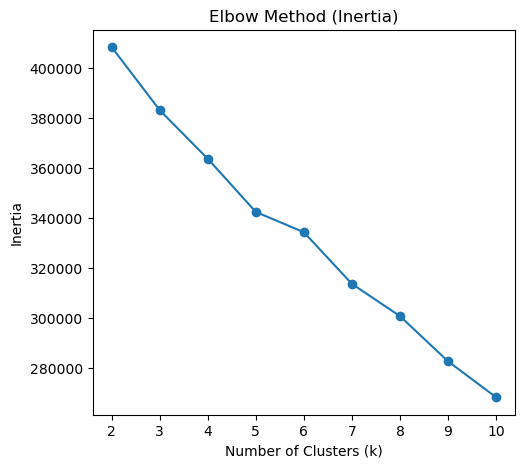

In [21]:
# Elbow Method
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(Ks, inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

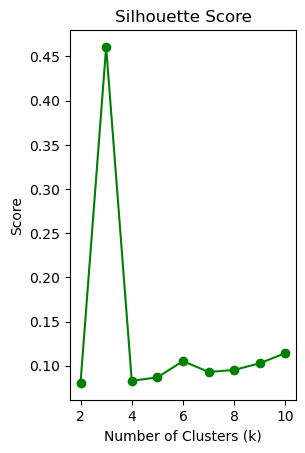

In [22]:
# Silhouette Score
plt.subplot(1,2,2)
plt.plot(Ks, sils, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.show()

In [23]:
# Train Final KMeans Model
k_final = 4   # <-- Adjust after checking Elbow/Silhouette plots
km = KMeans(n_clusters=k_final, n_init=10, random_state=42)
df['Cluster'] = km.fit_predict(Xs)

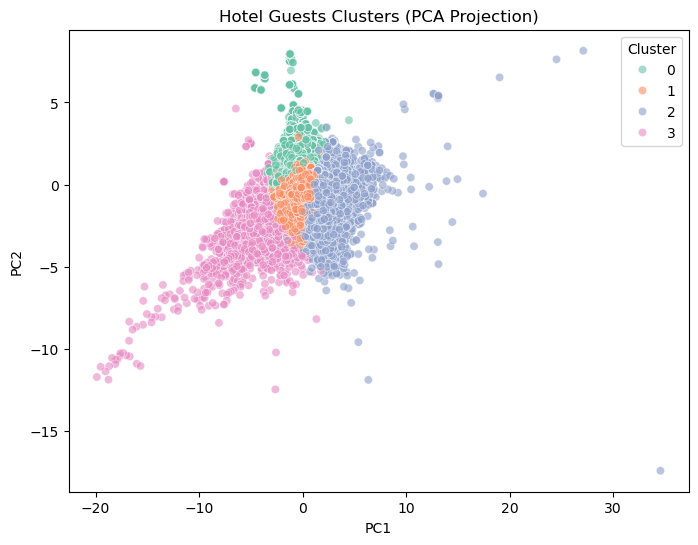

In [26]:
# Visualize Clusters(PCA)
pca = PCA(n_components=2, random_state=42)
Xp = pca.fit_transform(Xs)

plt.figure(figsize=(8,6))
sns.scatterplot(x=Xp[:,0], y=Xp[:,1], hue=df['Cluster'], palette="Set2", alpha=0.6)
plt.title("Hotel Guests Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [27]:
# Cluster Profiling
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
cluster_counts = df['Cluster'].value_counts().sort_index()

print("\nCluster Summary:\n", cluster_summary)
print("\nCluster Sizes:\n", cluster_counts)

# Save results
df.to_csv("hotel_booking_with_clusters.csv", index=False)
cluster_summary.to_csv("cluster_profiles.csv")


Cluster Summary:
          lead_time  stays_in_weekend_nights  stays_in_week_nights  adults  \
Cluster                                                                     
0           124.31                     0.76                  2.15    1.83   
1            88.37                     0.74                  2.09    1.83   
2           115.41                     1.77                  4.32    2.06   
3            30.85                     0.43                  1.44    1.38   

         children  babies  is_repeated_guest  previous_cancellations  \
Cluster                                                                
0            0.02    0.00               0.00                    0.18   
1            0.02    0.00               0.00                    0.02   
2            0.49    0.04               0.00                    0.01   
3            0.03    0.00               0.98                    0.49   

         previous_bookings_not_canceled  booking_changes  \
Cluster                  